DATA103: Activity: Feature Selection and Data Handling Methods (30 pts)

by Michael Dave A. Que

Objective: To assess your ability to implement code, analyze, and comprehend the concepts of feature selection, handling imbalanced data, missing data, and types of missing data.

In [290]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix



# Load the Excel file into a pandas DataFrame.
df = pd.read_csv("C:/Users/acer/Documents/Data Sci/Projects/DATA103/MBA 2.csv")

**Part I. Data Exploration and Preprocessing (10 points):**
* Load the dataset and perform basic exploratory data analysis (EDA).
* Identify and analyze the types of missing data (MCAR, MAR, MNAR) based on domain knowledge and statistical tests.
* Justify your choice of missing data handling technique based on the identified type of missing data.
* Handle missing values using appropriate techniques (e.g., imputation, deletion).
* Analyze the distribution of features and target variables.
* Normalize or standardize numerical features as needed.
* Encode categorical features using suitable methods (e.g., one-hot encoding, label encoding).



**Part I.A Load the dataset and perform basic exploratory data analysis (EDA).**

In [291]:
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


Load the dataset and perform basic exploratory data analysis (EDA).

In [292]:
df.dtypes

application_id      int64
gender             object
international        bool
gpa               float64
major              object
race               object
gmat              float64
work_exp          float64
work_industry      object
admission          object
dtype: object

In [293]:
# Check for missing values
missing_info = df.isnull().sum()
print("Missing values:\n", missing_info)

Missing values:
 application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64


In [294]:
df['race'].value_counts(dropna=False)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64

In [295]:
df['admission'].value_counts(dropna=False)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64

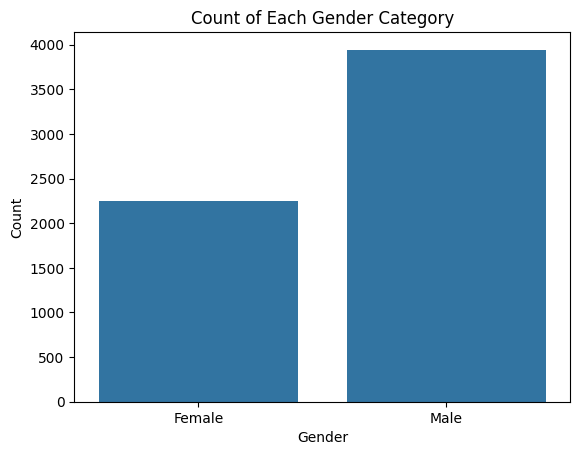

In [296]:
#Distribution For Gender
sns.countplot(x='gender', data=df)

plt.title('Count of Each Gender Category')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

In [297]:
Percent_of_males = df[df['gender']=="Male"]['gender'].count() / df['gender'].count() * 100
Percent_of_males = round(Percent_of_males, 2)
print("Percentage of males in the sample is ", Percent_of_males, "%")

Percentage of males in the sample is  63.66 %


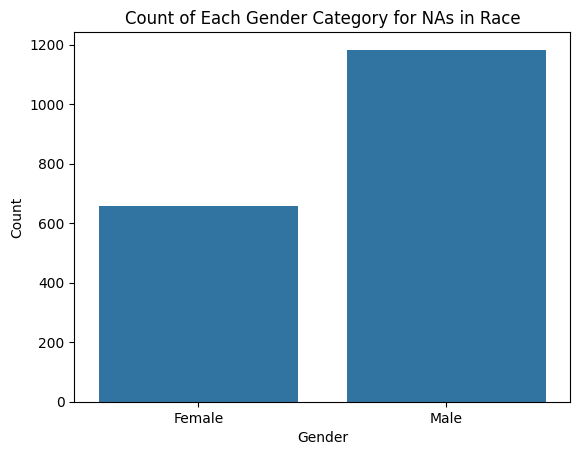

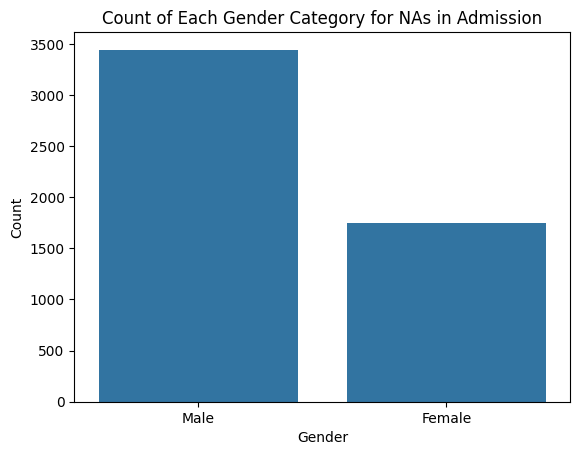

In [298]:
#Distribution For Gender for NAs in race
sns.countplot(x='gender', data=df[df['race'].isna()])

plt.title('Count of Each Gender Category for NAs in Race')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

#Distribution For Gender for NAs in admissions
sns.countplot(x='gender', data=df[df['admission'].isna()])

plt.title('Count of Each Gender Category for NAs in Admission')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

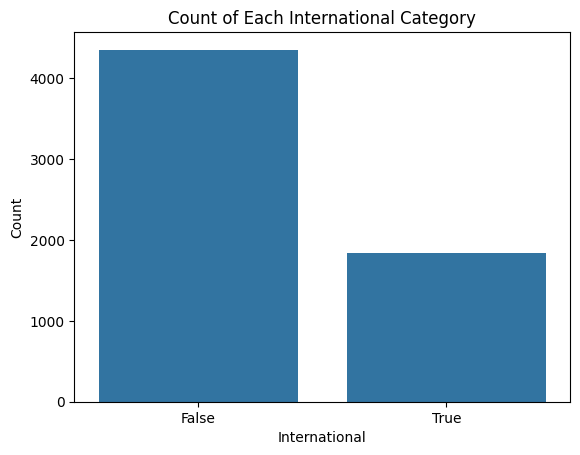

In [299]:
#Distribution For International
sns.countplot(x='international', data=df)

plt.title('Count of Each International Category')
plt.xlabel('International')
plt.ylabel('Count')

plt.show()

In [300]:
Percent_of_not_international = df[df['international']==False]['international'].count() / df['international'].count() * 100
Percent_of_not_international = round(Percent_of_not_international, 2)
print("Percentage of not international in the sample is ", Percent_of_not_international, "%")

Percentage of not international in the sample is  70.26 %


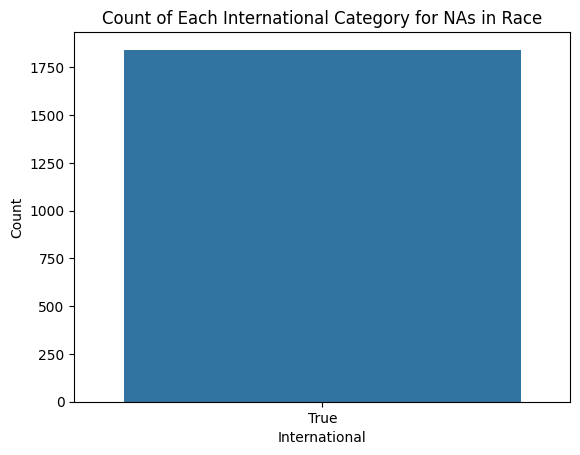

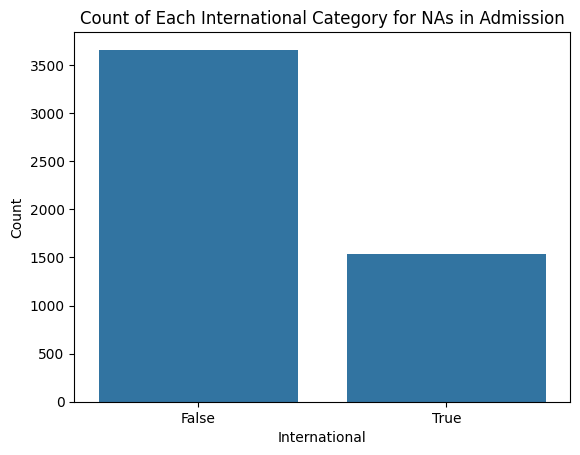

In [301]:
#Distribution For International for NAs in race
sns.countplot(x='international', data=df[df['race'].isna()])

plt.title('Count of Each International Category for NAs in Race')
plt.xlabel('International')
plt.ylabel('Count')

plt.show()

#Distribution For International for NAs in admission
sns.countplot(x='international', data=df[df['admission'].isna()])

plt.title('Count of Each International Category for NAs in Admission')
plt.xlabel('International')
plt.ylabel('Count')

plt.show()

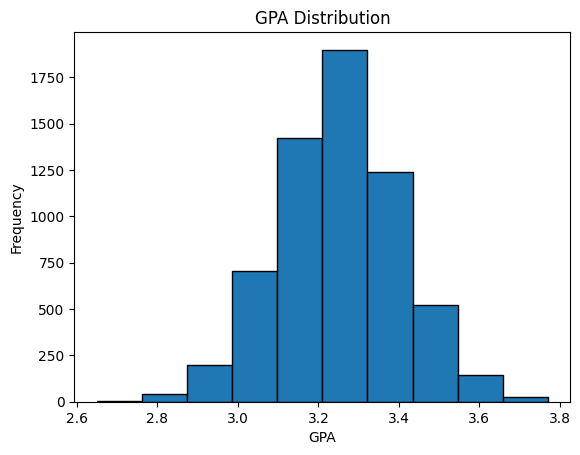

In [302]:
#Distribution For GPA
plt.hist(df['gpa'], bins=10, edgecolor='black')

plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequency')

plt.show()

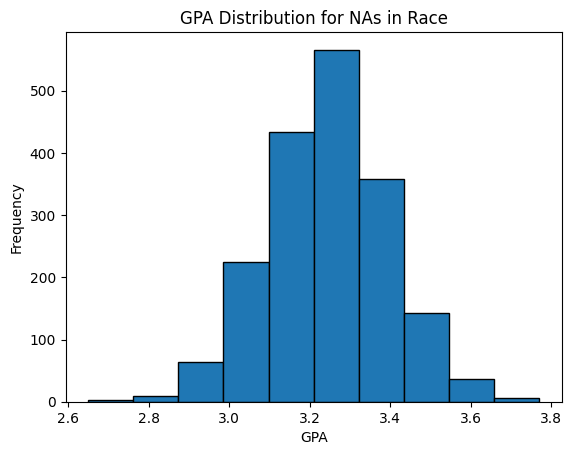

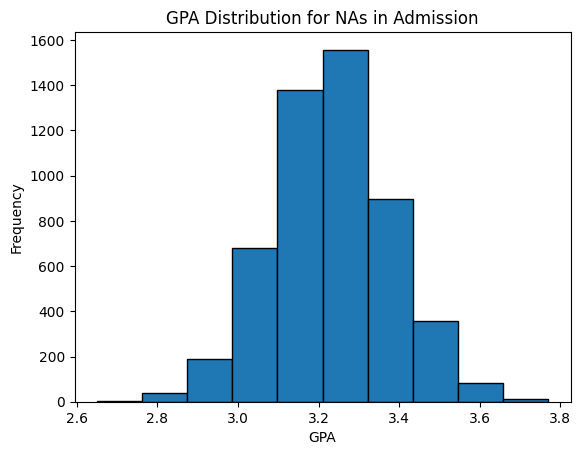

In [303]:
# Distribution For GPA for NAs in Race
plt.hist(df[df['race'].isna()]['gpa'], bins=10, edgecolor='black')
plt.title('GPA Distribution for NAs in Race')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

# Distribution For GPA for NAs in Admission
plt.hist(df[df['admission'].isna()]['gpa'], bins=10, edgecolor='black')
plt.title('GPA Distribution for NAs in Admission')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

In [304]:
# Calculate the average GPA for Race vs Race Missing

df_test = df
df_test['race_missing'] = df_test['race'].isnull().astype(int)

average_gpa = df_test.groupby('race_missing')['gpa'].mean().reset_index()
average_gpa.columns = ['Race Status', 'Average GPA']
average_gpa

,Race Status,Average GPA
0,0,3.253527
1,1,3.244066


In [305]:
# Calculate the average GPA for Race vs Race Missing

df_test = df.copy()
df_test['race'] = df_test['race'].fillna('Missing')
average_gpa = df_test.groupby('race')['gpa'].mean().reset_index()
average_gpa

,race,gpa
0,Asian,3.254874
1,Black,3.254007
2,Hispanic,3.255822
3,Missing,3.244066
4,Other,3.261603
5,White,3.249911


In [306]:
# Calculate the average GPA for Admission vs Admission Missing

df_test = df
df_test['admission_missing'] = df_test['admission'].isnull().astype(int)

average_gpa_admission = df_test.groupby('admission_missing')['gpa'].mean().reset_index()
average_gpa_admission.columns = ['Admission Status', 'Average GPA']
average_gpa_admission

,Admission Status,Average GPA
0,0,3.350730
1,1,3.231457


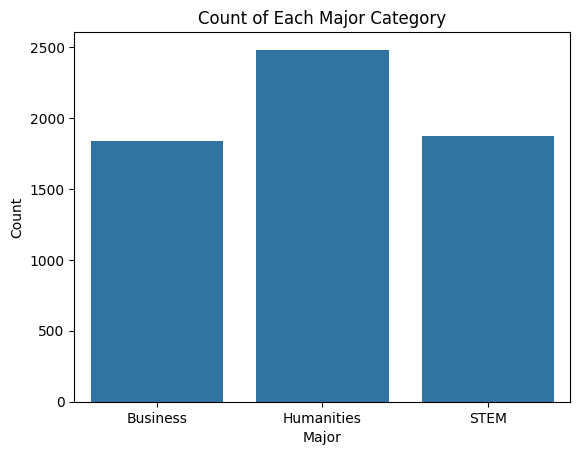

In [307]:
#Distribution For Major
sns.countplot(x='major', data=df)

plt.title('Count of Each Major Category')
plt.xlabel('Major')
plt.ylabel('Count')

plt.show()

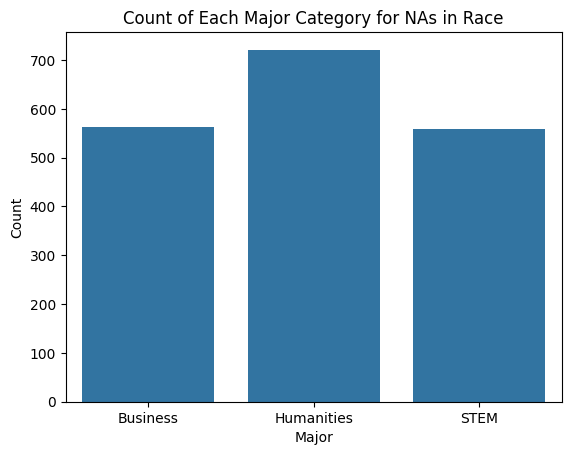

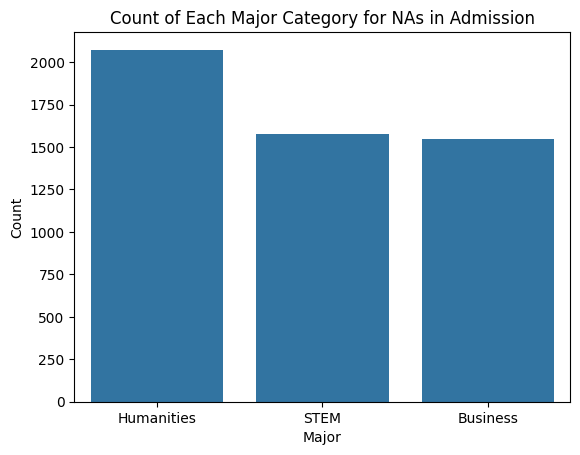

In [308]:
#Distribution For Major for NAs in Race
sns.countplot(x='major', data=df[df['race'].isna()])

plt.title('Count of Each Major Category for NAs in Race')
plt.xlabel('Major')
plt.ylabel('Count')

plt.show()

#Distribution For Major for NAs in Admission
sns.countplot(x='major', data=df[df['admission'].isna()])

plt.title('Count of Each Major Category for NAs in Admission')
plt.xlabel('Major')
plt.ylabel('Count')

plt.show()

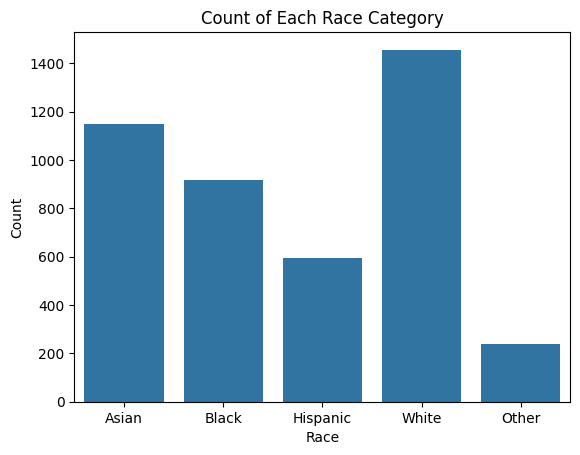

In [309]:
#Distribution For Race
sns.countplot(x='race', data=df)

plt.title('Count of Each Race Category')
plt.xlabel('Race')
plt.ylabel('Count')

plt.show()

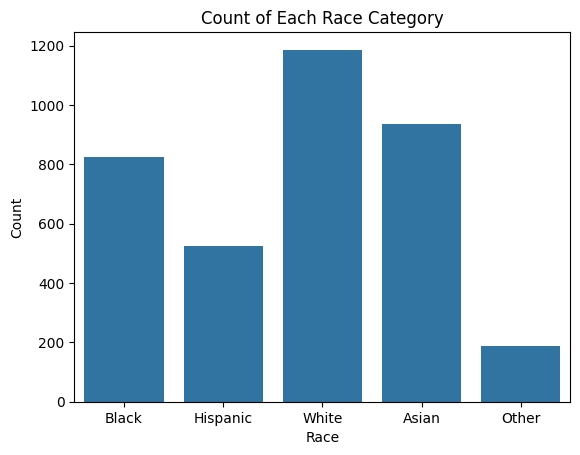

In [310]:
#Distribution For Race for NAs in Admission
sns.countplot(x='race', data=df[df['admission'].isna()])

plt.title('Count of Each Race Category')
plt.xlabel('Race')
plt.ylabel('Count')

plt.show()

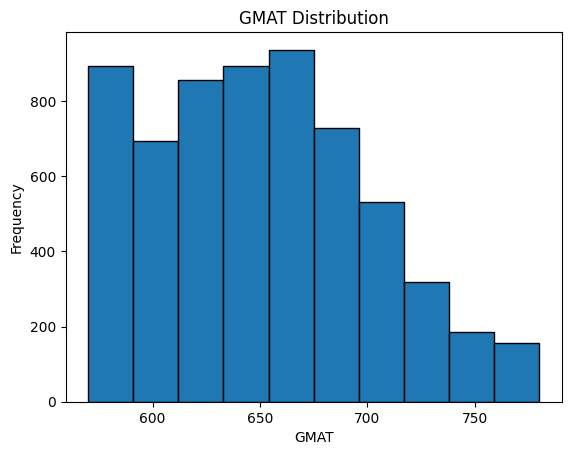

In [311]:
#Distribution For GMAT
plt.hist(df['gmat'], bins=10, edgecolor='black')

plt.title('GMAT Distribution')
plt.xlabel('GMAT')
plt.ylabel('Frequency')

plt.show()

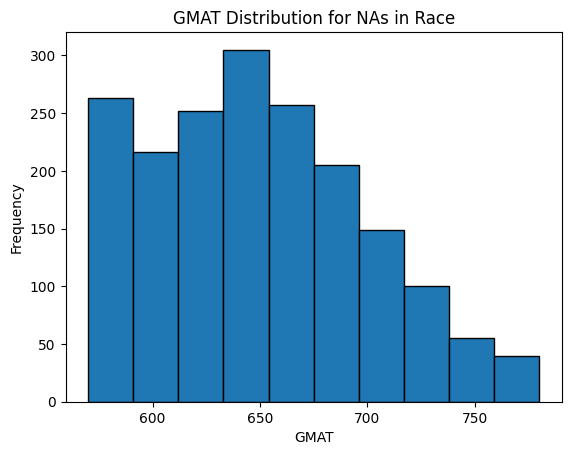

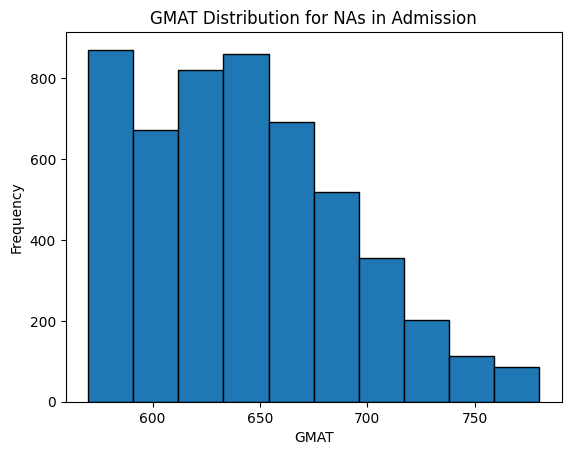

In [312]:
# Distribution For GMAT for NAs in Race
plt.hist(df[df['race'].isna()]['gmat'], bins=10, edgecolor='black')
plt.title('GMAT Distribution for NAs in Race')
plt.xlabel('GMAT')
plt.ylabel('Frequency')
plt.show()

# Distribution For GMAT for NAs in Admission
plt.hist(df[df['admission'].isna()]['gmat'], bins=10, edgecolor='black')
plt.title('GMAT Distribution for NAs in Admission')
plt.xlabel('GMAT')
plt.ylabel('Frequency')
plt.show()

In [313]:
# Calculate the average GMAT for Race vs Race Missing

df_test = df
df_test['race_missing'] = df_test['race'].isnull().astype(int)


average_gmat = df_test.groupby('race_missing')['gmat'].mean().reset_index()
average_gmat.columns = ['Race Status', 'Average GMAT']
average_gmat

,Race Status,Average GMAT
0,0,651.567096
1,1,649.972856


In [314]:
# Calculate the average GPA for Race vs Race Missing

df_test = df.copy()
df_test['race'] = df_test['race'].fillna('Missing')
average_gmat = df_test.groupby('race')['gmat'].mean().reset_index()
average_gmat

,race,gmat
0,Asian,652.693984
1,Black,652.270742
2,Hispanic,651.325503
3,Missing,649.972856
4,Other,652.742616
5,White,650.144231


In [315]:
# Calculate the average GMAT for Admission vs Admission Missing

df_test = df
df_test['admission_missing'] = df_test['admission'].isnull().astype(int)

average_gmat = df_test.groupby('admission_missing')['gmat'].mean().reset_index()
average_gmat.columns = ['Admission Status', 'Average GMAT']
average_gmat

,Admission Status,Average GMAT
0,0,690.820000
1,1,643.444359


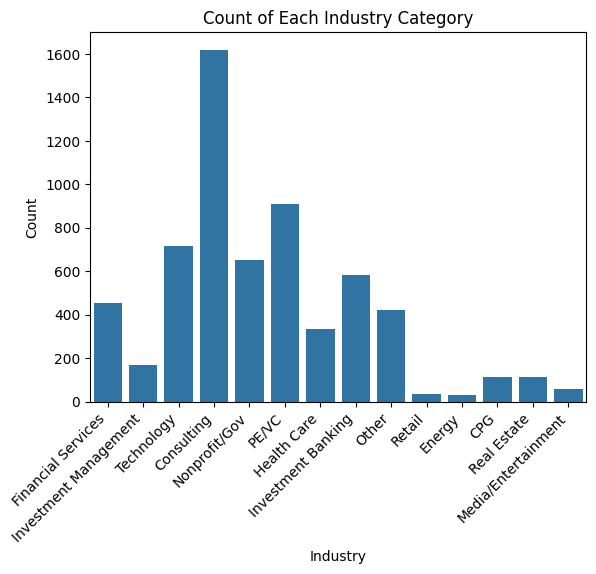

In [316]:
#Distribution For Industry
sns.countplot(x='work_industry', data=df)

plt.title('Count of Each Industry Category')
plt.xlabel('Industry')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')
plt.show()

In [317]:
Percent_of_Consulting = df[df['work_industry']=="Consulting"]['work_industry'].count() / df['work_industry'].count() * 100
Percent_of_Consulting = round(Percent_of_Consulting, 2)
print("Percentage of those working in Consulting Industry in the sample is ", Percent_of_Consulting, "%")

Percentage of those working in Consulting Industry in the sample is  26.14 %


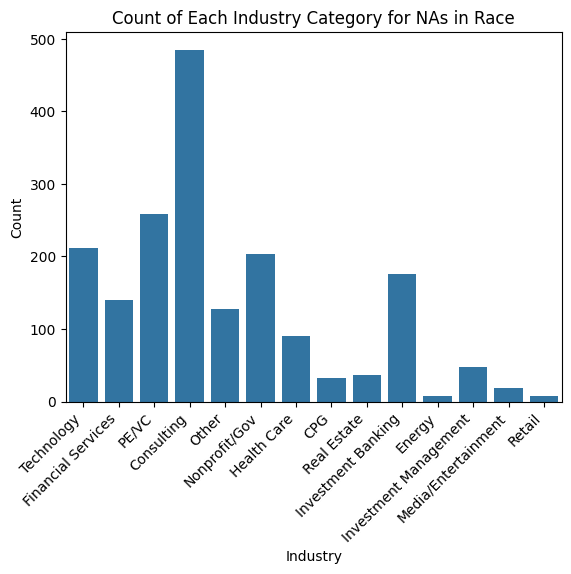

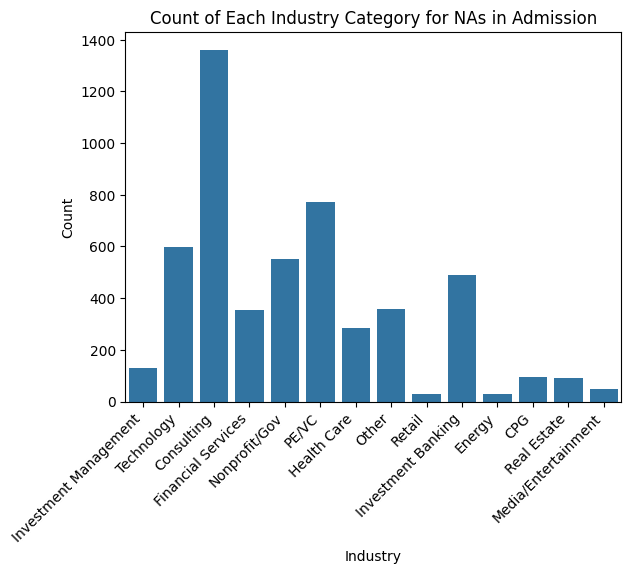

In [318]:
#Distribution For Industry for NAs in Race
sns.countplot(x='work_industry', data=df[df['race'].isna()])

plt.title('Count of Each Industry Category for NAs in Race')
plt.xlabel('Industry')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')
plt.show()

#Distribution For Industry for NAs in Admission
sns.countplot(x='work_industry', data=df[df['admission'].isna()])

plt.title('Count of Each Industry Category for NAs in Admission')
plt.xlabel('Industry')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')
plt.show()

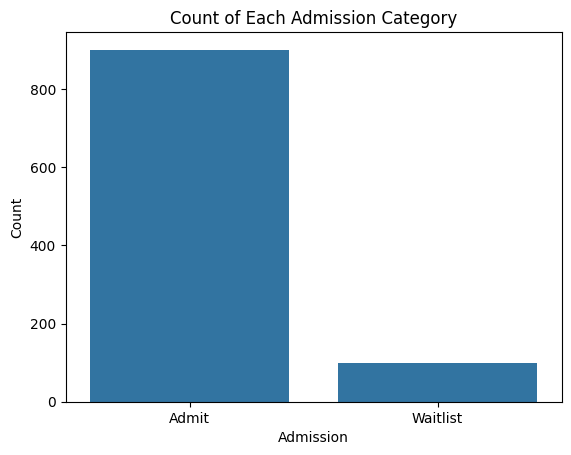

In [319]:
#Distribution For Admission
sns.countplot(x='admission', data=df)

plt.title('Count of Each Admission Category')
plt.xlabel('Admission')
plt.ylabel('Count')

plt.show()

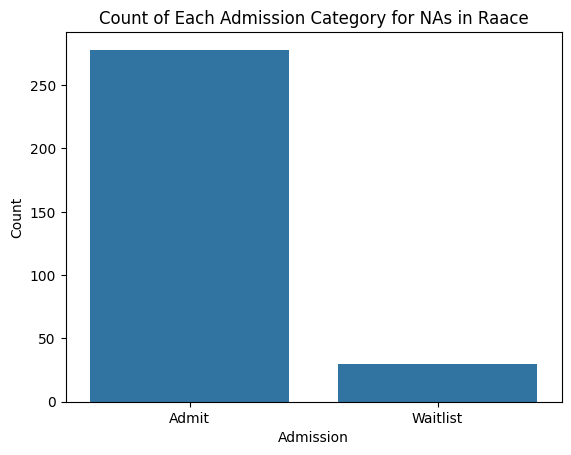

In [320]:
#Distribution For Admission for NAs in Race
sns.countplot(x='admission', data=df[df['race'].isna()])

plt.title('Count of Each Admission Category for NAs in Raace')
plt.xlabel('Admission')
plt.ylabel('Count')

plt.show()

**EDA Findings:**
- The dataset is a sample of 6194 rows and 10 columns.
- The features with missing values are race and admission. Admission has 5194 with NA results out of the sample 6194
- Males dominate the genders among the sample (covering 63.66% of the data)
- A large portion (70.26%) of the dataset are not international applicants
- All applications that have NA in race are international applicants
- The mean difference in GPA between those with Race that are NA is only 0.01 while the average GPA of those with admission of NA is 3.23 (0.10 lower than the average GPA of those with admission results)
- Major does not have a observable difference in distribution whether or not the sample has missing Race or Admission values: Humanities is the highest, followed by STEM and Business.
- There is a bias on the data in terms of Race with majority falling under White and Asian.
- Average GMAT for those with race of NA is only 2 points lower than does without NA but for the sample with missing admission, average GMAT is 643 vs those who have an admission result with an average GMAT of 691
- Consulting is the industry with the largest contribution, capturing 26.14 % of the data.

**Part I.B Identify and analyze the types of missing data (MCAR, MAR, MNAR) based on domain knowledge and statistical tests.**

**Identify and analyze the types of missing data of Admission**

Little's MCAR Test

In [321]:
df_test = df
df_test['admission_missing'] = df_test['admission'].isnull().astype(int)

with_missing = df_test[df_test['admission_missing'] == 1]['gpa']
without_missing = df_test[df_test['admission_missing'] == 0]['gpa']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(with_missing, without_missing, equal_var=False)

print("T-test results:", t_stat, p_value)

# Interpretation
if p_value < 0.05:
    print("Data is not MCAR")
else:
    print("Data is MCAR")

T-test results: -26.309835949151076 1.3331219498745145e-126
Data is not MCAR


Pattern Analysis: Conduct hypothesis tests to compare groups with and without missing data.

In [322]:
X = df_test[['gpa']] 
y = df_test['admission_missing'] 

X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

# Interpretation
p_value = result.pvalues['gpa']
if p_value < 0.05:
    print("There is a significant relationship between GPA and missing admission, indicating MAR")
else:
    print("There is no significant relationship between GPA and missing admission, indicating MNAR")


Optimization terminated successfully.
         Current function value: 0.398085
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      admission_missing   No. Observations:                 6194
Model:                          Logit   Df Residuals:                     6192
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:                 0.09948
Time:                        23:47:25   Log-Likelihood:                -2465.7
converged:                       True   LL-Null:                       -2738.1
Covariance Type:            nonrobust   LLR p-value:                1.730e-120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.5213      0.883     23.239      0.000      18.790      22.252
gpa           -5.7342      0.

**Identify and analyze the types of missing data of Race**

Little's MCAR Test

In [323]:
df_test = df
df_test['race_missing'] = df_test['race'].isnull().astype(int)

with_missing = df_test[df_test['race_missing'] == 1]['gpa']
without_missing = df_test[df_test['race_missing'] == 0]['gpa']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(with_missing, without_missing, equal_var=False)

print("T-test results:", t_stat, p_value)

# Interpretation
if p_value < 0.05:
    print("Data is not MCAR")
else:
    print("Data is MCAR")

T-test results: -2.2521315728803883 0.02437595124614772
Data is not MCAR


Pattern Analysis: Conduct hypothesis tests to compare groups with and without missing data.

In [324]:
X = df_test[['gpa']] 
y = df_test['race_missing'] 

X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

# Interpretation
p_value = result.pvalues['gpa']
if p_value < 0.05:
    print("There is a significant relationship between GPA and missing admission, indicating MAR")
else:
    print("There is no significant relationship between GPA and missing admission, indicating MNAR")


Optimization terminated successfully.
         Current function value: 0.608225
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           race_missing   No. Observations:                 6194
Model:                          Logit   Df Residuals:                     6192
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Oct 2024   Pseudo R-squ.:               0.0006694
Time:                        23:47:25   Log-Likelihood:                -3767.3
converged:                       True   LL-Null:                       -3769.9
Covariance Type:            nonrobust   LLR p-value:                   0.02467
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4799      0.597      0.804      0.421      -0.690       1.650
gpa           -0.4124      0.

**ANSWER**: The findings of these tests suggest that the  missing values in both Admission and Race is Missing at Random (MAR) . A low p-value (typically less than 0.05) suggests that there is a statistically significant difference between the means in the GPA of these two groups that have admission/race results and that do not have. Hence, the low p-value indicates that the distribution of gpa differs significantly based on whether or not the variables are missing.

**Part I.C Justify your choice of missing data handling technique based on the identified type of missing data. Handle missing values using appropriate techniques (e.g., imputation, deletion).**

In [325]:
df = pd.read_csv("C:/Users/acer/Documents/Data Sci/Projects/DATA103/MBA 2.csv")
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


**IMPUTATION ON MISSING DATA ON RACE:** The following codes indicate that all race with NA values are international individuals. This means to properly handle the missing data, we can simply change the missing values in race to be "Others" and drop the column of international. While there is already an "Other" category in race, since there is no general pattern for race with missing values, relative to other races based on the EDA, it is best to fit the races with missing value as "Others".

In [326]:
df[df['race'].isna()]['international'].value_counts(dropna=False)

international
True    1842
Name: count, dtype: int64

In [327]:
df['international'].value_counts(dropna=False)

international
False    4352
True     1842
Name: count, dtype: int64

In [328]:
df['race'] = df['race'].fillna("Others")

In [329]:
df = df.drop(columns=['international'])
df

,application_id,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,3.30,Business,Others,710.0,5.0,Technology,Admit
3,4,Male,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...
6189,6190,Male,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,3.22,Business,Others,680.0,5.0,Health Care,Admit
6192,6193,Male,3.36,Business,Others,590.0,5.0,Other,NaN


**IMPUTATION ON MISSING DATA ON ADMISSION:** The following codes reveals the distribution of GPA for missing admission results and for those who were waitlisted or admitted. These results indicate that while missing admission has a statistically significant negative correlation wth GPA, it does not necessarily mean that all these missing admission results are rejected since some of their results have even higher GPA than those who were admitted. Instead of immediatelly assuming that these missing results are rejected applicants, I chose to identify the portion of them as rejected based on those that have a higher probability of being rejected. I did this by assuming that all those with misisng values in admission and with a GPA lower than 3.0 are rejected. The importance of GPA in determining admission is based on an article by Coursera that most universities require a GPA of 3.0 (https://www.coursera.org/articles/mba-with-low-gpa). From here, I employ a KNN classification algorithim to predict whether the remaining missing results in admission are Admit, Waitlist, or Reject.

In [330]:
df[df['admission'].isnull()]['gpa'].describe()

count    5194.000000
mean        3.231457
std         0.148152
min         2.650000
25%         3.130000
50%         3.230000
75%         3.330000
max         3.770000
Name: gpa, dtype: float64

In [331]:
df[df['admission'].notna()]['gpa'].describe()

count    1000.000000
mean        3.350730
std         0.127772
min         2.890000
25%         3.270000
50%         3.350000
75%         3.430000
max         3.740000
Name: gpa, dtype: float64

In [332]:
df[df['admission'] == "Admit"]['gpa'].describe()

count    900.000000
mean       3.354867
std        0.126637
min        2.890000
25%        3.270000
50%        3.350000
75%        3.430000
max        3.740000
Name: gpa, dtype: float64

In [333]:
df[df['admission'] == "Waitlist"]['gpa'].describe()

count    100.0000
mean       3.3135
std        0.1325
min        2.9000
25%        3.2400
50%        3.3200
75%        3.4100
max        3.6500
Name: gpa, dtype: float64

In [334]:
df.loc[(df['admission'].isnull()) & (df['gpa'] < 3), 'admission'] = 'Reject'

In [335]:
df['admission'].value_counts(dropna=False)


admission
NaN         4922
Admit        900
Reject       272
Waitlist     100
Name: count, dtype: int64

In [336]:
df

,application_id,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,3.30,Business,Others,710.0,5.0,Technology,Admit
3,4,Male,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...
6189,6190,Male,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,3.22,Business,Others,680.0,5.0,Health Care,Admit
6192,6193,Male,3.36,Business,Others,590.0,5.0,Other,NaN


In [337]:
#Encode categorical features using suitable methods (one-hot encoding)
df1 = pd.get_dummies(df, columns=['gender', 'major', 'race', 'work_industry'], drop_first=True).drop(columns=['application_id'])
df1


,gpa,gmat,work_exp,admission,gender_Male,major_Humanities,major_STEM,race_Black,race_Hispanic,race_Other,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,3.30,620.0,3.0,Admit,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.28,680.0,5.0,NaN,True,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3.30,710.0,5.0,Admit,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3.47,690.0,6.0,NaN,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.35,590.0,5.0,NaN,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,3.49,640.0,5.0,NaN,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6190,3.18,670.0,4.0,NaN,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6191,3.22,680.0,5.0,Admit,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6192,3.36,590.0,5.0,NaN,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [338]:
X = df1.drop(columns=['admission'])
y = df1['admission']


X_train = X[~y.isna()]
y_train = y[~y.isna()]
X_test = X[y.isna()]

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

predicted_admission = knn_classifier.predict(X_test)

df1.loc[y.isna(), 'admission'] = predicted_admission


In [339]:
df1['admission'].value_counts()

admission
Admit       3920
Reject      1877
Waitlist     397
Name: count, dtype: int64

**Part II. Feature Selection (10 points):**
* Implement at least two feature selection methods (e.g., correlation, chi-squared test, mutual information, recursive feature elimination).
* Rank the features based on their importance and select a subset of relevant features.
* Justify your choice of feature selection methods and explain the rationale behind your feature selection.

**Correlation Analysis:**
* Correlation analysis is a straightforward method that helps identify linear relationships between features and the target variable. It's computationally efficient and provides immediate insights into which features might be influential.
* To employ this technique, I chose to only use continuous features in ranking and I made a new variable "admitted" to best show which features are most important to influence an applicant to be admitted. I included those who were Reject or Waitlist on admission to be 0 while those who were Admit were assigned 1.


In [340]:
df2 = df1.copy()
df2['admitted'] = (df2['admission'] == "Admit").astype(int)

<Axes: >

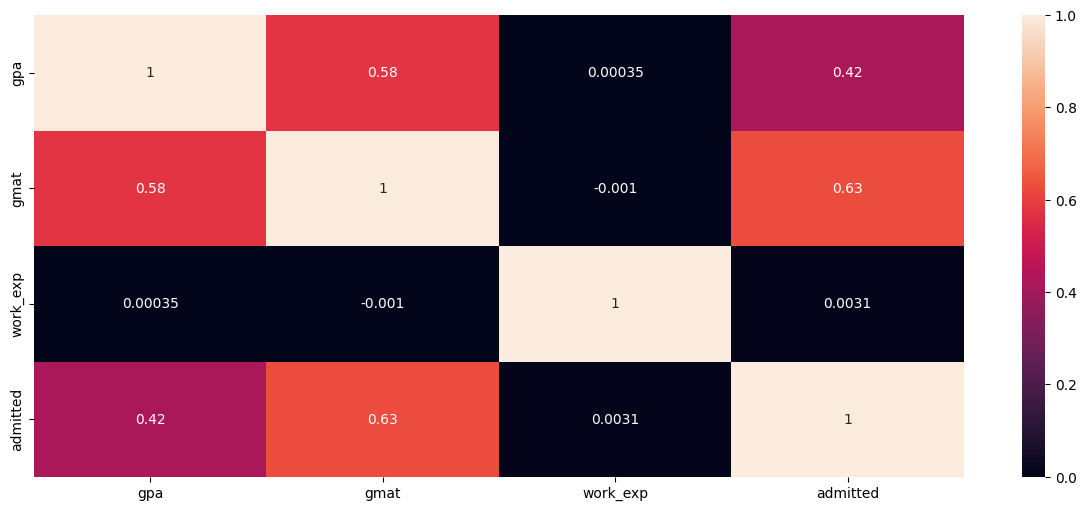

In [341]:
fs_corr_df = df2[['gpa','gmat','work_exp','admitted']]
df_corr = fs_corr_df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(df_corr, annot=True, )

In [342]:
# Rank features based on correlation
corr_matrix = fs_corr_df.corr()

target_corr = corr_matrix['admitted'].abs()

correlation_ranking = target_corr.sort_values(ascending=False)

print("Feature Ranking Based on Correlation:")
print(correlation_ranking)


Feature Ranking Based on Correlation:
admitted    1.000000
gmat        0.626952
gpa         0.418895
work_exp    0.003098
Name: admitted, dtype: float64


**ANALYSIS:** The results indicate that GMAT is the most influencial, followed by GPA and Work Experience. However, it should be noted that there the findings suggest issues related ot multicollinearity especially between the correlation of GMAT and GPA.



**Mutual Information:**
* Mutual information provides a quantitative measure of the amount of information that knowing a feature provides about a target variable. This is particularly useful for categorical target variables, such as admission outcomes.
* By measuring how much uncertainty about the target variable is reduced when the feature's value is known, mutual information helps in identifying which features are more predictive.

In [343]:
df2 = df2.drop(columns="admission")
df2

,gpa,gmat,work_exp,gender_Male,major_Humanities,major_STEM,race_Black,race_Hispanic,race_Other,race_Others,...,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology,admitted
0,3.30,620.0,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,3.28,680.0,5.0,True,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,1
2,3.30,710.0,5.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,1
3,3.47,690.0,6.0,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,1
4,3.35,590.0,5.0,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,3.49,640.0,5.0,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,0
6190,3.18,670.0,4.0,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1
6191,3.22,680.0,5.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1
6192,3.36,590.0,5.0,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,0


In [344]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

X = df2.drop('admitted', axis=1) 
y = df2['admitted']  

mi = mutual_info_classif(X, y, discrete_features='auto')

mi_df = pd.DataFrame(mi, index=X.columns, columns=['Mutual Information'])
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print("Feature Ranking Based on Mutual Information with Categorical Target:")
print(mi_df)

Feature Ranking Based on Mutual Information with Categorical Target:
                                     Mutual Information
gmat                                           0.294236
gpa                                            0.107164
work_exp                                       0.014632
race_White                                     0.009826
work_industry_Retail                           0.009328
gender_Male                                    0.008169
work_industry_Financial Services               0.005760
work_industry_Nonprofit/Gov                    0.004256
race_Other                                     0.003463
work_industry_Real Estate                      0.003369
major_STEM                                     0.002158
work_industry_Other                            0.001157
major_Humanities                               0.000376
race_Black                                     0.000206
work_industry_Media/Entertainment              0.000000
work_industry_PE/VC                

**ANALYSIS:**
* The highest score indicates that GMAT scores have a strong relationship with the admission outcome. This means that higher GMAT scores likely provide significant information about whether a candidate is admitted. This is especially consistent with our findings in EDA, where since the GPA of applicants have relatively the same level in average value, the GMAT score is what separates those who get admitted and those who don't.
* The results from mutual information analysis support the notion that academic metrics (GMAT and GPA) play a crucial role in determining admissions, while demographic factors (like gender) and employment history appear to have a less significant impact.

**Part III. Handling Imbalanced Data**
* Analyze the class distribution and identify if the dataset is imbalanced.
* Implement at least two techniques to handle imbalanced data (e.g., oversampling, undersampling, SMOTE, class weighting).
* Evaluate the impact of these techniques on the model's performance.


To identify if the dataset is imbalanced, I started off in identifying whicb among the data is admitted or not using a bar chart

admitted
1    3920
0    2274
Name: count, dtype: int64


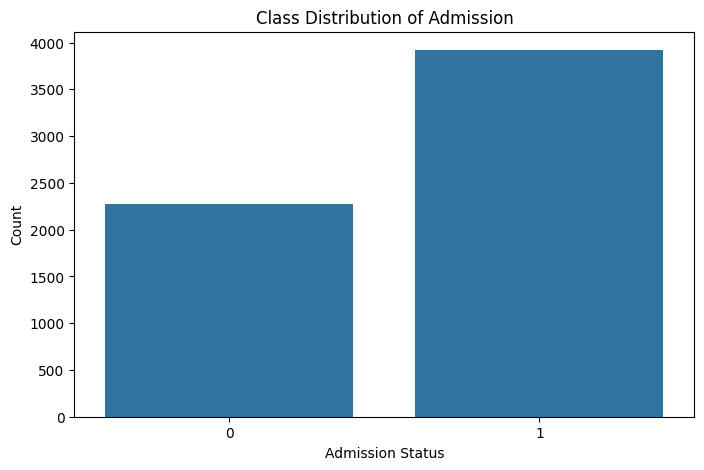

In [345]:
class_counts = df2['admitted'].value_counts()
print(class_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df2, x='admitted')
plt.title('Class Distribution of Admission')
plt.ylabel('Count')
plt.xlabel('Admission Status')
plt.show()

In [346]:
Percent_of_admitted = df2[df2['admitted']==1]['admitted'].count() / df2['admitted'].count() * 100
Percent_of_admitted = round(Percent_of_admitted, 2)
print("Percentage of not international in the sample is ", Percent_of_admitted, "%")

Percentage of not international in the sample is  63.29 %


In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy


def analyze_imbalance(df2, column):
    print(f"\nAnalysis for column: {column}")


    value_counts = df2[column].value_counts()
    total_count = len(df2[column])

    print("Value counts:")
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")

    imbalance_ratio = value_counts.max() / value_counts.min()
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}")

    ent = entropy(value_counts)
    max_ent = np.log2(len(value_counts))
    normalized_ent = ent / max_ent
    print(f"Normalized entropy: {normalized_ent:.2f}")

    gini = 1 - np.sum((value_counts / total_count) ** 2)
    print(f"Gini impurity: {gini:.2f}")

    simpson = 1 - np.sum((value_counts * (value_counts - 1)) / (total_count * (total_count - 1)))
    print(f"Simpson's diversity index: {simpson:.2f}")

    if imbalance_ratio > 10:
        print("Interpretation: Severe imbalance")
    elif imbalance_ratio > 3:
        print("Interpretation: Moderate imbalance")
    else:
        print("Interpretation: Mild or no significant imbalance")

    print("\n" + "-" * 50)

analyze_imbalance(df2, 'admitted') 



Analysis for column: admitted
Value counts:
1: 3920 (63.29%)
0: 2274 (36.71%)

Imbalance ratio: 1.72
Normalized entropy: 0.66
Gini impurity: 0.46
Simpson's diversity index: 0.46
Interpretation: Mild or no significant imbalance

--------------------------------------------------


**ANALYSIS:** The results indicate that 63.28% of the sample are admitted, suggesting mild or no significant imbalance. Nevertheless, to better address potential imbalances, I propose utilizing two techniques: SMOTE and Class Weighting. To evaluate the performance of these techniques, I employed the Random Forest Classifier. Random Forest is an excellent choice for predicting admissions because it has the ability to assess feature importance; however, it is built on decision trees, which can be sensitive to class imbalance. Thus, utilizing these techniques allows for better handling of any potential imbalances within the dataset, ensuring that the model captures overall patterns while adequately attending to the minority class.

**SMOTE:**
SMOTE (Synthetic Minority Over-sampling Technique) works by creating synthetic examples of the minority class, thereby improving the model's ability to generalize from limited data and leading to better predictive performance on underrepresented classes. The advantage of the technique is its ability to mitigate the overfitting risk associated with simple oversampling methods. 

In [348]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df2.drop('admitted', axis=1)
y = df2['admitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
print(pd.Series(y_resampled).value_counts())


y_pred = model.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

admitted
0    3127
1    3127
Name: count, dtype: int64
Confusion Matrix:
[[381  65]
 [ 95 698]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       446
           1       0.91      0.88      0.90       793

    accuracy                           0.87      1239
   macro avg       0.86      0.87      0.86      1239
weighted avg       0.87      0.87      0.87      1239



**Evaluation:**
The implementation of SMOTE has effectively balanced the class distribution in the dataset, making the number of admitted and not admitted cases equal. However, the model's performance is weaker when predicting the "not admitted" class, as indicated by lower precision and recall for this class in the classification report and confusion matrix. This could be due to the inclusion of "Waitlist" cases under the "not admitted" category, which were combined with those classified as "Rejected." This merging may have negatively impacted the model's ability to differentiate between these groups, leading to less accurate predictions for the "not admitted" class. The model may struggle to capture the nuances between waitlisted and rejected cases, affecting its overall performance.

**CLASS WEIGHTING:** Class weighting is another effective technique for addressing class imbalance in classification problems. Instead of modifying the dataset, class weighting allows you to inform the model about the imbalance by assigning different weights to the classes during training. This way, the model penalizes misclassifications of the minority class more heavily than those of the majority class. This technique could be particularly useful given that in the previous SMOTE implementation, the model had better predictive results for the "admitted" class, likely due to the original class imbalance where there were more admitted applicants than non-admitted ones.

In [349]:
X = df2.drop('admitted', axis=1)
y = df2['admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[369  77]
 [ 74 719]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       446
           1       0.90      0.91      0.90       793

    accuracy                           0.88      1239
   macro avg       0.87      0.87      0.87      1239
weighted avg       0.88      0.88      0.88      1239



**Evaluation:** The class weighting method improved the model's balance in predicting both admitted and non-admitted applicants, with an accuracy of 88%. However, the results are not necessariy the better than SMOTE, especially for those in "non-admitted" class. The use of class_weight='balanced' might be contributing to the poorer performance on the "not admitted" class. When using this option, the model automatically adjusts the weights based on the class frequencies in the original dataset, giving more weight to the minority class. However, it doesn't introduce new data points to address the imbalance, like SMOTE does. This can lead to the model still favoring the majority class (admitted) because the inherent imbalance in the dataset remains, and the decision boundary may not shift enough to improve performance on the "not admitted" class.

**Part IV. BONUS: Model Building and Evaluation (10 points):**
* Build a classification model (e.g., logistic regression, random forest, support vector machine) using the selected features and balanced dataset.
* Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC curve).
* Discuss the strengths and weaknesses of the chosen model and suggest potential improvements.


**Model Selection:** Given the nature of the dataset and the 0 or 1 value of the predicted admitted variable, my choise of classifcation model is logistic regression. The models offers strengths such as simplicity, interpretability, and computational efficiency, making it a suitable choice for binary classification. However, it assumes a linear relationship between independent variables and the target, which can lead to poor performance in cases of non-linearity and sensitivity to outliers. Nevertheless, I am able to address issues related to imbalances through the implementation of SMOTE and I have not found significant outliers during the EDA.

In [350]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

#Load and Split Data
X = df2.drop(columns=['admitted'])
y = df2['admitted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Implement Logistic Regression with L2 regularization
clf = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Cross-validation to evaluate model performance
cv_scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5)
print(f"Cross-validation Accuracy Scores: {cv_scores}")

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation Metrics
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print(report_df)


Cross-validation Accuracy Scores: [0.80175859 0.82094325 0.80175859 0.87769784 0.8768    ]
              precision    recall  f1-score      support
0              0.741453  0.778027  0.759300   446.000000
1              0.871595  0.847415  0.859335   793.000000
accuracy       0.822437  0.822437  0.822437     0.822437
macro avg      0.806524  0.812721  0.809317  1239.000000
weighted avg   0.824748  0.822437  0.823326  1239.000000


**EVALUATION:** The model has a high accuracy score of 82.24%. Interestingly, we continue to see the pattern that 1 or admitted applicants are better predicted by the model than not admitted applicants.